### ESMA 3016
### Edgar Acuna
### Lab22: Comparando la Varianza y la media de dos poblaciones (varianzas iguales)

In [1]:
import numpy as np
from math import sqrt
import pandas as pd 
from scipy import stats
from scipy.stats import f 
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Comparacion de la varianza de las notas de varones y mujeres
#Primera manera de entrar los datos 
notas=[50,75,80,68,95,84,78,87,56,61,75,89,80,70,83]
genero=['f','f','f','f','f','f','f','f','m','m','m','m','m','m','m']
a=pd.DataFrame({'notas' : notas,'genero' : genero})

In [3]:
a

,genero,notas
0,f,50
1,f,75
2,f,80
3,f,68
4,f,95
5,f,84
6,f,78
7,f,87
8,m,56
9,m,61


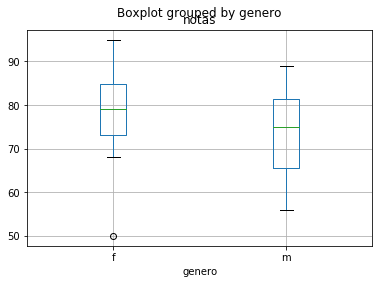

In [4]:
a.boxplot(column='notas',by='genero')

## Calculos con la distribucion F

In [5]:
# Calculo de la pdf de una F con 8 grados de libertad en el numerador y 10 gl en el denominador en el punto x=3
f.pdf(3,8,10)

0.051000154304584433

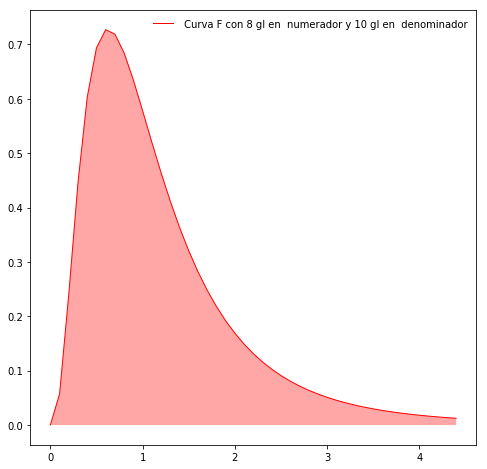

In [15]:
plt.figure(figsize=(8,8))
x=np.arange(0,4.5,.1)
plt.plot(x, f.pdf(x,8,10), 'k-', lw=1, label=' Curva F con 8 gl en  numerador y 10 gl en  denominador',color='r')
plt.fill_between(x, y1= f.pdf(x,8,10),facecolor='red',alpha=0.35)
plt.legend(loc='best', frameon=False)

In [6]:
# calculo de la probabilidad de una F(8,10) hasta x=3
f.cdf(3,8,10)

0.94648744195060674

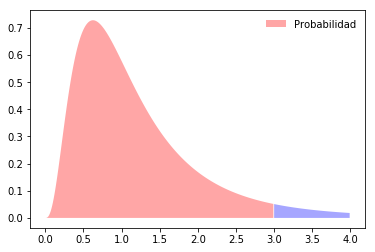

In [11]:
plt.fill_between(x=np.arange(0,3,0.01), y1= f.pdf(np.arange(0,3,0.01),8,10),facecolor='red',alpha=0.35,label='Probabilidad')
plt.fill_between(x=np.arange(3,4,0.01), y1= f.pdf(np.arange(3,4,0.01),8,10),facecolor='blue',alpha=0.35)
plt.legend(loc='best', frameon=False)

In [7]:
#Calculo del percentil del 90% de  una F(8,10)
f.ppf(.90,8,10)

2.3771500226405138

In [8]:
#Simulando 10,000 valores de una F(8,10)
a=f.rvs(8,10,size=10000)

In [9]:
#Estimando la media de una F con 8 gl en el numerador y 10 en el denominador 
np.mean(a)

1.2559136476860604

#### El valor exacto de la media es 10/(10-2)= 1.25

## Comparacion de la varianza de las notas de varones y mujeres

In [11]:
#Segunda manera de entrar los datos 
mujeres=[50,75,80,68,95,84,78,87]
varones=[56,61,75,89,80,70,83]

In [12]:
#Haciendo una funcion que halle p-value de la prueba estadistica de F
#para probar igualdad de varianza de dos grupos
def Ftest(grupo1,grupo2):
    #Esta funcion calcula el p-value de la prueba F
    a1 = 1.0*np.array(grupo1)
    n1 = len(a1)
    a2 = 1.0*np.array(grupo2)
    n2 = len(a2)
    s1, s2 = np.std(a1,ddof=1), np.std(a2,ddof=1)
    test=(s1/s2)**2
    p_value=2*min(f.cdf(test,n1-1,n2-1),1-f.cdf(test,n1-1,n2-1))
    print "La prueba de F es:",test,"El p-value es:", p_value    
    return

### Comparando las varianzas
#### $H_o: \sigma_1^2=\sigma_2^2$  
#### $H_a: \sigma_1^2\neq\sigma_2^2$

#### Prueba Estadistica:
## $$F=\frac{s{_1}^2}{s{_2}^2}$$

In [13]:
Ftest(mujeres,varones)

La prueba de F es: 1.30821284465 El p-value es: 0.759235392089


#### Conclusion: como el Pvalue es 0.75 mucho mayor que .05 No se rechaza la hipotesis Nula y se conluye 
#### que no hay suficente evidencia estadistica para concluir que las varianzas de las notas de las mujeres y varones sea
#### distinta

In [17]:
#Extrayendo los dos grupos de un dataframe
grupo1=a.query('genero=="f"')['notas']
grupo2=a.query('genero=="m"')['notas']

In [18]:
#Prueba de F para igualdad de varianza si los datos viene de 
#la anterior manera
Ftest(grupo1,grupo2)

La prueba de F es: 1.30821284465 El p-value es: 0.759235392089


### Ejemplo para comparar los scores de hombres y mujeres en aprovechamiento matematico

In [19]:

# Ejemplo para comparar los scores de hombres y mujeres en aprovechamiento matematico
#leyendo los datos aprovech.csv de la internet
aprovech=pd.read_csv("http://academic.uprm.edu/eacuna/aprovech.csv",sep=",")

In [20]:
aprovech

,Aprovech,Escuela
0,580,publica
1,638,publica
2,642,privada
3,704,publica
4,767,privada
5,641,privada
6,721,privada
7,625,privada
8,694,publica
9,615,publica


In [21]:
#Extrayendo los dos grupos
grupo1=aprovech.query('Escuela=="privada"')['Aprovech']
grupo2=aprovech.query('Escuela=="publica"')['Aprovech']

In [22]:
grupo1.var()

3063.3666666666663

In [23]:
grupo2.var()

2037.1428571428571

## Haciendo la prueba de igualdad de varianzas
#### $H_o: \sigma_1^2=\sigma_2^2$  
#### $H_a: \sigma_1^2\neq\sigma_2^2$

In [24]:
Ftest(grupo1,grupo2)

La prueba de F es: 1.50375642824 El p-value es: 0.600930704069


#### Conclusion: como el p-value es .6009 mayor que .5 NO se rechaza la hipotesi nula y se
#### concluye que NO hay sificiente estadistica para apoyar que las varianzas del aprovechamiento
#### matematico de hombres y mujeres son distintas

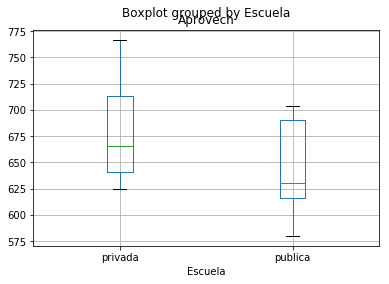

In [25]:
#Comparando lso dos grupos usando boxplots
aprovech.boxplot(column='Aprovech',by='Escuela')

### Probando igualdad de dos medias asumiendo igual varianza
#### $H_o: \mu_1=\mu_2$  
#### $H_a: \mu_1\neq\mu_2$

In [26]:
stats.ttest_ind(grupo1, grupo2, equal_var = True)

Ttest_indResult(statistic=1.3364680977703087, pvalue=0.20618499344443425)

#### El p-value de la prueba de T es .206 mayor que .05 No se rechaza la Hipotesis nula

### La funcion stats.ttest_ind solo hace prueba hipotesis de dos lados